# Import modules

In [25]:
# geo-data handling
import xarray as xr

# standard numerical package
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Load data

## Land mask

In [26]:
lm_files = ['b.e21.BSSP585cmip6.f09_g17.control.01.cam.h0.LANDFRAC.201501-206412.nc',
            'b.e21.BSSP585cmip6.f09_g17.control.01.cam.h0.LANDFRAC.206501-209912.nc']

files = {'Control': lm_files}

In [27]:
scenarios = ['Control']
lm1 = {}

for scenario in scenarios:
    # collect all partial datasets
    da_container = []
    for file_name in files[scenario]:
        path = f"./data/{scenario}/{file_name}"
        da_container.append(xr.open_dataset(path).LANDFRAC)
    # concatenate the dataset
    lm1[scenario] = xr.concat(da_container,dim='time')
    
# change 0 to nan
land_mask = lm1['Control'].where(lm1['Control'].data == 1, np.nan) 

## Temperature

In [4]:
T_cnt_files = ['b.e21.BSSP585cmip6.f09_g17.control.01.cam.h0.TREFHT.201501-206412.nc',
            'b.e21.BSSP585cmip6.f09_g17.control.01.cam.h0.TREFHT.206501-209912.nc']

# due to an error that occured during the simulation, the years 2045-2050 are faulty in the first run.
# one has to manually crop them
T_sai2020_files = ['b.e21.BSSP585cmip6.f09_g17.2020feedback.01.cam.h0.TREFHT.202001-202912.nc',
                'b.e21.BSSP585cmip6.f09_g17.2020feedback.01.cam.h0.TREFHT.203001-203912.nc',
                'b.e21.BSSP585cmip6.f09_g17.2020feedback.01.cam.h0.TREFHT.204001-204912.nc',
                'b.e21.BSSP585cmip6.f09_g17.2020feedback.02.cam.h0.TREFHT.204501-209412.nc',
                'b.e21.BSSP585cmip6.f09_g17.2020feedback.02.cam.h0.TREFHT.209501-209912.nc']

T_sai2080_files = ['b.e21.BSSP585cmip6.f09_g17.feedback.05.cam.h0.TREFHT.208001-208512.nc',
                'b.e21.BSSP585cmip6.f09_g17.feedback.06.cam.h0.TREFHT.208601-209912.nc']

files = {
    'Control': T_cnt_files,
    'SAI 2020': T_sai2020_files,
    'SAI 2080': T_sai2080_files
}

In [5]:
# save the temperature data in dictionaries indexed by the scenario name
scenarios = ['Control', 'SAI 2020', 'SAI 2080']
T1 = {}

for scenario in scenarios:
    # collect all partial datasets
    da_container = []
    for file_name in files[scenario]:
        path = f"./data/{scenario}/{file_name}"
        # handle the special case of SAI2020
        if (scenario == 'SAI 2020') and (file_name == T_sai2020_files[2]):
            da_container.append(xr.open_dataset(path).TREFHT.sel(time=slice('2040','2044')))
        else:
            da_container.append(xr.open_dataset(path).TREFHT)
    # concatenate the dataset
    T1[scenario] = xr.concat(da_container,dim='time')

In [6]:
# without land mask
T = {'Control': T1['Control'].sel(time = slice('2015', '2099')) - 273.15,
     'SAI 2020': T1['SAI 2020'].sel(time = slice('2020', '2099')) - 273.15,
     'SAI 2080': xr.concat((T1['Control'].sel(time = slice('2020', '2079')), T1['SAI 2080'].sel(time = slice('2080', '2099'))), dim = 'time') - 273.15}

## Precipitation

In [7]:
PRECC_cnt_files = ['b.e21.BSSP585cmip6.f09_g17.control.01.cam.h0.PRECC.201501-206412.nc',
                   'b.e21.BSSP585cmip6.f09_g17.control.01.cam.h0.PRECC.206501-209912.nc']

PRECL_cnt_files = ['b.e21.BSSP585cmip6.f09_g17.control.01.cam.h0.PRECL.201501-206412.nc',
                   'b.e21.BSSP585cmip6.f09_g17.control.01.cam.h0.PRECL.206501-209912.nc']

# due to an error that occured during the simulation, the years 2045-2050 are faulty in the first run.
# one has to manually crop them
PRECC_sai2020_files = ['b.e21.BSSP585cmip6.f09_g17.2020feedback.01.cam.h0.PRECC.202001-202912.nc',
                       'b.e21.BSSP585cmip6.f09_g17.2020feedback.01.cam.h0.PRECC.203001-203912.nc',
                       'b.e21.BSSP585cmip6.f09_g17.2020feedback.01.cam.h0.PRECC.204001-204912.nc',
                       'b.e21.BSSP585cmip6.f09_g17.2020feedback.02.cam.h0.PRECC.204501-209412.nc 7.18.08',
                       'b.e21.BSSP585cmip6.f09_g17.2020feedback.02.cam.h0.PRECC.209501-209912.nc']

PRECL_sai2020_files = ['b.e21.BSSP585cmip6.f09_g17.2020feedback.01.cam.h0.PRECL.202001-202912.nc',
                       'b.e21.BSSP585cmip6.f09_g17.2020feedback.01.cam.h0.PRECL.203001-203912.nc',
                       'b.e21.BSSP585cmip6.f09_g17.2020feedback.01.cam.h0.PRECL.204001-204912.nc',
                       'b.e21.BSSP585cmip6.f09_g17.2020feedback.02.cam.h0.PRECL.204501-209412.nc',
                       'b.e21.BSSP585cmip6.f09_g17.2020feedback.02.cam.h0.PRECL.209501-209912.nc']

PRECC_sai2080_files = ['b.e21.BSSP585cmip6.f09_g17.feedback.09.cam.h0.PRECC.208001-209912.nc']

PRECL_sai2080_files = ['b.e21.BSSP585cmip6.f09_g17.feedback.09.cam.h0.PRECL.208001-209912.nc']

files_PRECC = {
    'Control': PRECC_cnt_files,
    'SAI 2020': PRECC_sai2020_files,
    'SAI 2080': PRECC_sai2080_files
}

files_PRECL = {
    'Control': PRECL_cnt_files,
    'SAI 2020': PRECL_sai2020_files,
    'SAI 2080': PRECL_sai2080_files
}

In [9]:
scenarios = ['Control', 'SAI 2020', 'SAI 2080']
PRECC1 = {}
PRECL1 = {}

for scenario in scenarios:
    # collect all partial datasets
    da_container = []
    for file_name in files_PRECC[scenario]:
        path = f"./data/{scenario}/{file_name}"
        # handle the special case of SAI2020
        if (scenario == 'SAI 2020') and (file_name == PRECC_sai2020_files[2]):
            da_container.append(xr.open_dataset(path,engine='netcdf4').PRECC.sel(time=slice('2040','2044')))
        else:
            da_container.append(xr.open_dataset(path,engine='netcdf4').PRECC)
    # concatenate the dataset
    PRECC1[scenario] = xr.concat(da_container,dim='time')
    
for scenario in scenarios:
    da_container = []
    for file_name in files_PRECL[scenario]:
        path = f"./data/{scenario}/{file_name}"
        # handle the special case of SAI2020
        if (scenario == 'SAI 2020') and (file_name == PRECL_sai2020_files[2]):
            da_container.append(xr.open_dataset(path).PRECL.sel(time=slice('2040','2044')))
        else:
            da_container.append(xr.open_dataset(path).PRECL)
    # concatenate the dataset
    PRECL1[scenario] = xr.concat(da_container,dim='time')

In [10]:
# total precipitation = convective precipitation + large-scale precipitation
prect1 = {'Control': (PRECC1['Control'] + PRECL1['Control']).sel(time = slice('2015', '2099')),
          'SAI 2020': (PRECC1['SAI 2020'] + PRECL1['SAI 2020']).sel(time = slice('2020', '2099')),
          'SAI 2080': xr.concat(
              ((PRECC1['Control'] + PRECL1['Control']).sel(time = slice('2020', '2079')),
               (PRECC1['SAI 2080'] + PRECL1['SAI 2080']).sel(time = slice('2080', '2099'))),
                dim = 'time') }

In [11]:
# without land mask
prect = { name: (prect1[name]*1000*3600*24*31) for name in scenarios }

# Functions

In [12]:
def spatial_gradient(da, var = 'temp'):
    
    """
    Takes an xarray DataArray defined over a lat/lon field over time
    and calculates the spatial gradient

    Parameters:
        da (Datarray): data array containing a field defined over latitudes (lat), longitudes (lon) and time
        var (string): variable
       
    Returns:
        Data Array
    """
    
    assert var in ['temp', 'prect'], f'var must be either temp or prect and not {var}'
        
    # define variables
    dlat = np.diff(da.lat.data)[0]
    dlon = np.diff(da.lon.data)[0]

    # add uniformly distributed random noise 
    b = da.stack(pos = ('lat', 'lon')).load()
    # for temperature --> between -0.05 and 0.05
    if var == 'temp':
        a_noise = b + (np.random.rand() * 0.1 - 0.05)
    # for precipitation --> between 0.001 and 0.1
    elif var == 'prect':
        a_noise = b + np.random.randint(1, 101) / 1000.0
    
    # calculate gradient
    gx = a_noise.unstack().mean(dim = 'time').differentiate('lon') / (2 * dlon * 2 * np.pi * 6371 * np.cos(np.radians(a_noise.unstack().lat+0.01)) / 360)
    gy = a_noise.unstack().mean(dim = 'time').differentiate('lat') / (2 * dlat * 2 * np.pi * 6371 / 360)
    g = np.sqrt(gx**2 + gy**2)
        
    return g

In [13]:
def temporal_trend(da, trend = '80'):
    
    """
    Takes an xarray DataArray defined over a lat/lon field over time
    and calculates the temporal trend for every grid cell

    Parameters:
        da (Datarray): data array containing a field defined over latitudes (lat), longitudes (lon) and time
        trend (string): years to average over
       
    Returns:
        Data Array
    """
    
    assert trend in ['80', '10'], f'trend must be either 80 or 10 and not {trend}'
    
    # do yearly average
    data = da.groupby('time.year').mean(dim = 'time').stack(pos = ('lat', 'lon'))
    
    if trend == '80':
        x = np.arange(0, 80, 1)
    
    elif trend == '10':
        x = np.arange(0, 10, 1)
    
    slopes = np.polyfit(x, data.values, deg=1)[0]
    
    return np.reshape(slopes, (192, 288))

In [14]:
def climate_velocity(r, g):
    
    """
    Calculate the climate velocity vectors
    
    Parameters:
        r (): temporal trend
        g (DataArray): spatial gradient
       
    Returns:
        Data Array
    """
    
    return r/g

# Spatial gradient

## Temperature

In [15]:
# Control
T_g_con = spatial_gradient(T['Control'].sel(time = slice('2020', '2099')), var = 'temp')

# SAI 2020
T_g_sai20 = spatial_gradient(T['SAI 2020'].sel(time = slice('2020', '2099')), var = 'temp')

# SAI 2080
T_g_sai80 = spatial_gradient(T['SAI 2080'].sel(time = slice('2080', '2089')), var = 'temp') 

## Precipitation

In [17]:
# Control
prect_g_con = spatial_gradient(prect['Control'].sel(time = slice('2020', '2099')), var = 'prect')

# SAI 2020
prect_g_sai20 = spatial_gradient(prect['SAI 2020'].sel(time = slice('2020', '2099')), var = 'prect')

# SAI 2080
prect_g_sai80 = spatial_gradient(prect['SAI 2080'].sel(time = slice('2080', '2089')), var = 'prect') 

# Temporal trend

## Temperature

In [18]:
# control
T_r_con = temporal_trend(T['Control'].sel(time = slice('2020', '2099')), trend = '80')

# SAI 2020
T_r_sai20 = temporal_trend(T['SAI 2020'].sel(time = slice('2020', '2099')), trend = '80')

# SAI 2080
T_r_sai80 = temporal_trend(T['SAI 2080'].sel(time = slice('2080', '2089')), trend = '10') 

## Precipitation

In [19]:
# control
prect_r_con = temporal_trend(prect['Control'].sel(time = slice('2020', '2099')))

# SAI 2020
prect_r_sai20 = temporal_trend(prect['SAI 2020'].sel(time = slice('2020', '2099')))

# SAI 2080
prect_r_sai80 = temporal_trend(prect['SAI 2080'].sel(time = slice('2080', '2089')), trend = '10') 

# Velocity

In [20]:
path = 'path/to/save/nc_vel/files'

## Temperature

In [21]:
v_T_con = climate_velocity(T_r_con, T_g_con)
v_T_sai2020 = climate_velocity(T_r_sai20, T_g_sai20)
v_T_sai2080 = climate_velocity(T_r_sai80, T_g_sai80)

## Precipitation

In [22]:
v_prect_con = climate_velocity(prect_r_con, prect_g_con)
v_prect_sai2020 = climate_velocity(prect_r_sai20, prect_g_sai20)
v_prect_sai2080 = climate_velocity(prect_r_sai80, prect_g_sai80)

## Create netcdf files with the data

In [28]:
v_T_con.to_netcdf(path='./v_T_con.nc')
v_T_sai2020.to_netcdf(path='./v_T_sai2020.nc')
v_T_sai2080.to_netcdf(path='./v_T_sai2080.nc')

In [29]:
v_prect_con.to_netcdf(path='./v_prect_con.nc')
v_prect_sai2020.to_netcdf(path='./v_prect_sai2020.nc')
v_prect_sai2080.to_netcdf(path='./v_prect_sai2080.nc')

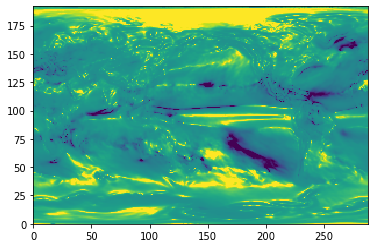

In [38]:
#quick sanity check...
import matplotlib.pyplot as plt
plt.pcolormesh(v_prect_con,vmin=-50,vmax=50)